<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CDissimilarity_Analysis_200701a_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Dissimilarity Analysis </h1>
<h3> Required: </h3>
<li> data file bc_unsupervised.mat </li>
<li> images: oval_V, oval_H, rectangular_H </li>
<li> Hu_moment invariants </li>


# Notebook setup

In [ ]:
import scipy.io as sio
import numpy.matlib as nm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Set up interactive plots:

In [ ]:
#%matplotlib notebook

In [ ]:
mpl.rcParams.update({"figure.figsize":(8,6)})

## Import all the data files

In [ ]:
!wget -O Unsupervised_data_200706a.zip https://drive.google.com/u/0/uc?id=1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub&export=download
!unzip Unsupervised_data_200706a.zip

--2021-07-27 04:08:34--  https://drive.google.com/u/0/uc?id=1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub
Resolving drive.google.com (drive.google.com)... 142.250.188.206, 2607:f8b0:4004:836::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8f1daeh2c0d9r120u9i7lvhub0fhotp2/1627358850000/07808887398243303382/*/1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub [following]
--2021-07-27 04:08:34--  https://doc-00-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8f1daeh2c0d9r120u9i7lvhub0fhotp2/1627358850000/07808887398243303382/*/1B8tGqq4T7UJ6JfRom4tNkOCOJInqYMub
Resolving doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)... 172.217.9.193, 2607:f8b0:4004:806::2001
Connecting to doc-00-94-docs.googleusercontent.com (doc-00-94-docs.googleusercontent.com)|172.217.9.

In [ ]:
#Loads data from FeGaPd composition spread
t = sio.loadmat('bc_unsupervised.mat')
cmp = t['CMP'] # Composition of samples
tth = t['TTH'] # Independent variable 2theta
xrd = t['XRD'] # Diffraction patterns

tth_ = nm.repmat(tth,xrd.shape[0],1)

print(xrd.shape, cmp.shape)

(278, 601) (278, 3)


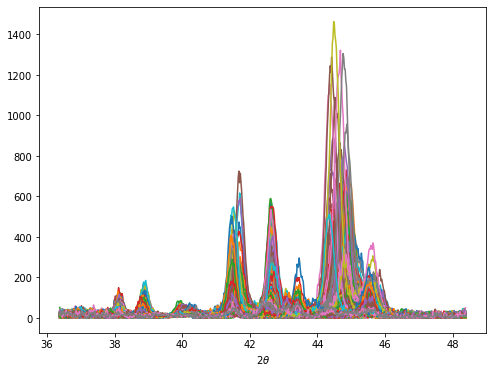

In [ ]:
# Plot data
# plot all diffraction patterns at once.

plt.figure()
plt.plot(tth_.T, xrd.T);
plt.xlabel(r'2$\theta$') # Use $$ to create latex equations
plt.show()

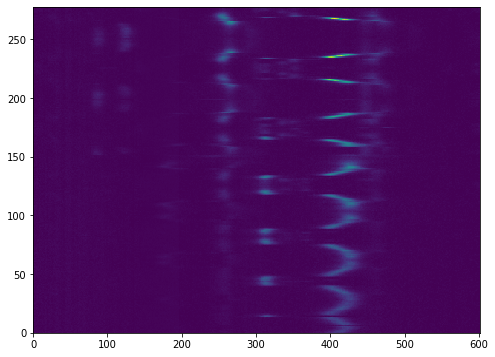

In [ ]:
# plot heatmap of diffraction patterns
plt.figure()
plt.pcolor(xrd)

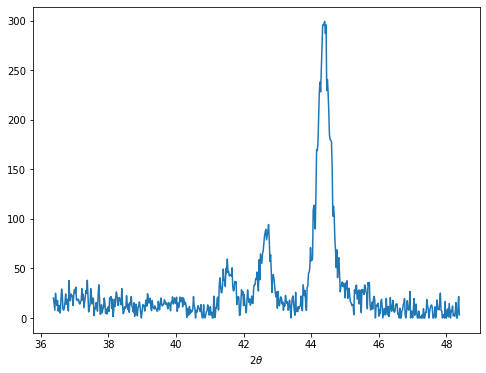

In [ ]:
# plot one diffraction pattern.
plt.figure()
plt.plot(tth_[0,],xrd[49,])
plt.xlabel(r'2$\theta$');

# Investigate Dissimilarity Measures

Measures

In [ ]:
#%%  ------- Measures -----------------------

# Create data sets for Scale Invariance example
# create data sets 1 and 2
xrd1 = xrd[189:196,] # data set 1
xrd2 = xrd[nm.arange(6,-1,-1),] # data set 2

print(xrd1.shape, xrd2.shape)

(7, 601) (7, 601)


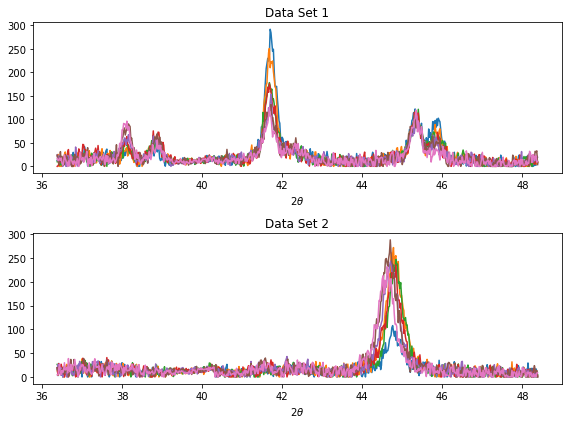

In [ ]:
#%%
# plot data set 1
plt.figure()
plt.subplot(2,1,1)
plt.plot(tth_[0:7,].T, xrd1.T);
plt.title('Data Set 1');
plt.xlabel(r'2$\theta$');

plt.subplot(2,1,2)
plt.plot(tth_[0:7,].T, xrd2.T)
plt.title('Data Set 2');
plt.xlabel(r'2$\theta$');
plt.tight_layout()

In [ ]:
s = nm.concatenate((xrd1, xrd2), axis=0) 

print(xrd1.shape, xrd2.shape, s.shape)

(7, 601) (7, 601) (14, 601)


## Compute dissimilarity matrices

In [ ]:
# Combine data into one matrix.
s = nm.concatenate((xrd1, xrd2), axis=0) 
from sklearn.metrics.pairwise import pairwise_distances

# generate dissimilarity matrix for L1, "cityblock" or "taxicab"
d1 = pairwise_distances(s, metric='manhattan')

print(s.shape, d1.shape)

(14, 601) (14, 14)


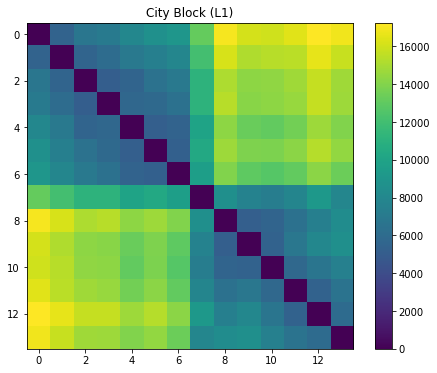

In [ ]:
# Visualize Dissimilarity matrix

# City Block (L1)
plt.figure()
plt.imshow(d1)
plt.title('City Block (L1)');
plt.colorbar()

In [ ]:
#%%
from scipy.spatial.distance import correlation

# generate dissimilarity matrix for L2, "Euclidean"
d2 = pairwise_distances(s, metric='euclidean')

# generate dissimilarity matrix for cosine metric.
d3 = pairwise_distances(s, metric='cosine')

d4 = pairwise_distances(s, metric='correlation')

Text(0.5, 1.0, 'Correlation')

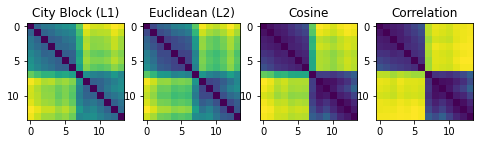

In [ ]:
#%% Visualize Dissimilarity matrices

# L1, Manhattan
plt.figure(3)
plt.clf()
plt.subplot(1,4,1)
plt.imshow(d1)
# plt.pcolor(d1)
# plt.gca().invert_yaxis()
plt.title('City Block (L1)');

# Euclidean
plt.figure(3)
plt.subplot(1,4,2)
plt.imshow(d2)
# plt.pcolor(d2)                            # View as heatmap
# plt.gca().invert_yaxis()
plt.title('Euclidean (L2)')

# And Cosine
plt.figure(3)
plt.subplot(1,4,3)
plt.imshow(d3)
# plt.pcolor(d3)                            # View as heatmap
# plt.gca().invert_yaxis()
plt.title('Cosine')

plt.subplot(1,4,4)
plt.imshow(d4)
# plt.pcolor(d3)                            # View as heatmap
# plt.gca().invert_yaxis()
plt.title('Correlation')


The heatmap looks block diagonal because the samples are in order based on their phase type. Can reorder to see what heatmap looks like if we don't know correct ordering of samples.

[ 6 13  3  4 11  9  2  8  5  0  7 12  1 10]


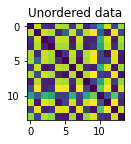

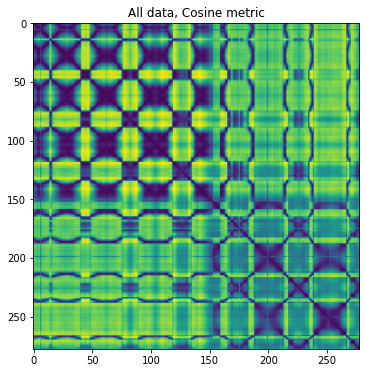

In [ ]:
# randomly permute the numbers from 1 to 14.
p = nm.random.permutation(14)

# compute the dissimilarity matrix for permuted data.
d4 = pairwise_distances( s[p,:] , metric='cosine')

# Visualize Dissimilarity matrix
plt.figure(3)
plt.subplot(1,4,4)
plt.imshow(d4)
# plt.pcolor(d4)
# plt.gca().invert_yaxis()
plt.title('Unordered data');

print(p)

d5 = pairwise_distances( xrd , metric='cosine')
plt.figure()
plt.imshow(d5)
plt.title('All data, Cosine metric');

# Dissimilarity in feature space - Moment Invariants
Using dissimilarity measures in a feature space. Assume features are first extracted from image using one of the techniques from yesterday.

In [ ]:
from scipy import misc
from imageio import imread

## Load the images

In [ ]:
im1 = imread('Oval_H.png')
im2 = imread('Oval_V.png')
im3 = imread('Rectangular_H.png')

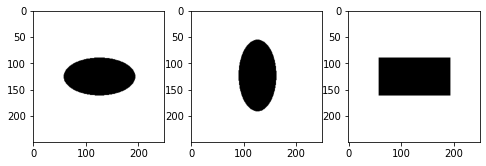

In [ ]:
#%% plot the images
plt.figure(4)
plt.clf()
plt.subplot(1,3,1)
plt.imshow(im1)

plt.subplot(1,3,2)
plt.imshow(im2)

plt.subplot(1,3,3)
plt.imshow(im3)

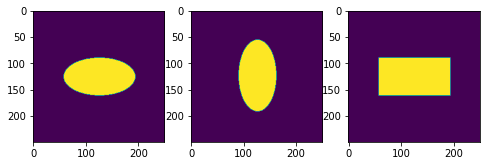

In [ ]:
#%% convert the images into binary masks
# 1 inside shape, 0 outside
mask1 = im1[:,:,1] < 255;
mask2 = im2[:,:,1] < 255;
mask3 = im3[:,:,1] < 255;

# combine images in one matrix to speed up analysis
mask = nm.dstack((mask1,mask2,mask3)).astype(float)

# plot the masks
plt.figure(5)
plt.clf()
plt.subplot(1,3,1)
plt.imshow(mask[:,:,0].astype(float))

plt.subplot(1,3,2)
plt.imshow(mask[:,:,1].astype(float))

plt.subplot(1,3,3)
plt.imshow(mask[:,:,2].astype(float))

## Compute the Hu moment invariants - invariant to translation, scale, and rotation.
* Uses code from [scikit-image](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.moments_hu)
* [Definition](https://en.wikipedia.org/wiki/Image_moment#Rotation_invariants)

In [ ]:
import skimage.measure

hu = nm.zeros((3,7))
for i in range(0,3):
    nu = skimage.measure.moments_central(mask[:,:,i], center=(125.5,125.5))
    nu = skimage.measure.moments_normalized(nu)
    hu[i,:] = skimage.measure.moments_hu(nu)
    
# initialize variable for absolute moment invariants
ami = nm.zeros((3,2))
ami[:,0] = 2./hu[:,0]

ami[:,1] = 4./( nm.power(hu[:,0],2) - hu[:,1] )

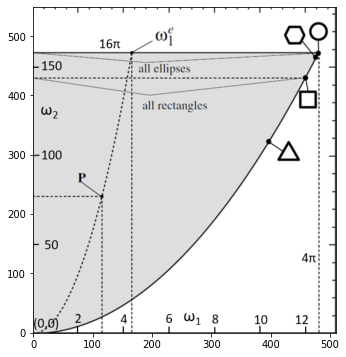

In [ ]:
#%% Plot Each shape onto the moment invariant plot.
bg = imread('moment_invariant_plot.png')

plt.figure(6)
plt.clf()

# plot the moment invariant figure as a background 
plt.imshow(nm.flipud(bg), origin='lower')

(0.0, 550.0)

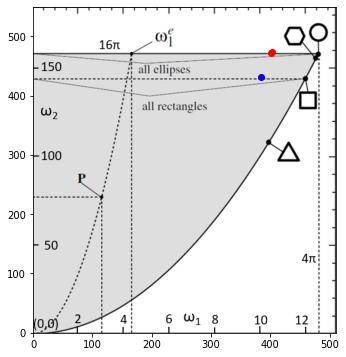

In [ ]:
#%% plot the ovals using moment invariants.
plt.figure(6)
plt.imshow(nm.flipud(bg), origin='lower')
plt.plot(ami[0:2,0] * 310/8,ami[0:2,1]*300/100,'ro')

# plot the rectangle using moment invariants.
plt.plot(ami[2,0] * 310/8,ami[2,1]*300/100,'bo')

plt.xlim(0, 510)
plt.ylim(0, 550)